Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   author_popularity  100 non-null    float64
 1   book_length        100 non-null    int64  
 2   num_keywords       100 non-null    int64  
 3   genre              100 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB
None

First few rows:
   author_popularity  book_length  num_keywords    genre
0          41.052297          776             5  mystery
1          48.950098          674             5  mystery
2           2.323401          633            19  fantasy
3          41.564184          169            12  mystery
4          65.129649          992            18  fantasy

✅ Accuracy: 0.30

📋 Classification Report:
              precision    recall  f1-score   support

     fantasy       0.00      0.00      0.00         4
     fiction    

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


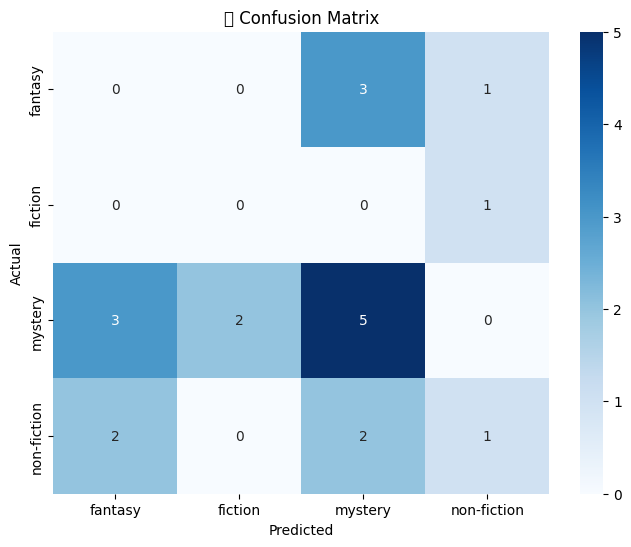


🎯 Example Prediction:
Predicted Genre: mystery


In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Step 1: Load the dataset
file_path = '/content/book_genres.csv'  # Adjust if needed
df = pd.read_csv(file_path)

# Step 2: Check basic info
print("Dataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Step 3: Handle missing values (if any)
df.fillna('', inplace=True)

# Step 4: Combine numerical features into a single string column
df['combined_features'] = (
    df['author_popularity'].astype(str) + ' ' +
    df['book_length'].astype(str) + ' ' +
    df['num_keywords'].astype(str)
)

# Step 5: Encode target (genre)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['genre'])

# Step 6: Split data into training and testing sets
X = df['combined_features']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 7: Vectorize the combined features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 8: Train a Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Step 9: Make predictions and evaluate
y_pred = model.predict(X_test_vec)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {accuracy:.2f}")

# Classification report
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Step 10: Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: Prediction function
def predict_genre(author_popularity, book_length, num_keywords):
    """
    Predicts the genre of a book using metadata features.
    """
    text = f"{author_popularity} {book_length} {num_keywords}"
    vec = vectorizer.transform([text])
    label = model.predict(vec)[0]
    return label_encoder.inverse_transform([label])[0]

# Step 12: Example usage
print("\n🎯 Example Prediction:")
example = predict_genre(75.5, 680, 12)
print("Predicted Genre:", example)
